In [1]:
# import the necessary packages
from collections import deque
import numpy as np
import argparse
import pickle
import cv2
import os
import json

from keras.models import load_model
import shutil

from keras.preprocessing import image                  
from tqdm.notebook import tqdm
from PIL import ImageFile                            
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Mounted at /content/drive


In [55]:
model = load_model('/content/drive/MyDrive/CV_project_final/models /CNN_model.hdf5')

In [56]:
JSON_DIR = os.path.join("/content/drive/MyDrive/CV_project/","json_files")

if not os.path.exists(JSON_DIR):
    os.makedirs(JSON_DIR)


In [57]:
with open(os.path.join("/content/drive/MyDrive/CV_project/", "labels_list.pkl"),"rb") as handle:
    labels_id = pickle.load(handle)


In [58]:
ImageFile.LOAD_TRUNCATED_IMAGES = True 


In [60]:

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    # img = image.load_img(img_path, target_size=(128, 128))
    img = image.load_img(img_path, target_size=(128, 128))
    # img = cv2.resize(img, dsize =(128, 128)) 
    # convert PIL.Image.Image type to 3D tensor with shape (128, 128, 3)
    x = image.img_to_array(img)

    # convert 3D tensor to 4D tensor with shape (1, 128, 128, 3) and return 4D tensor
    x = np.expand_dims(x, axis=0)
    lis = [x]
    return np.vstack(lis)

# def paths_to_tensor(img_paths):
    # list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    # return np.vstack(list_of_tensors)

def return_prediction(filename):
    
    ImageFile.LOAD_TRUNCATED_IMAGES = True  
    print(type(filename))
    test_tensors = path_to_tensor(filename)

    ypred_test = model.predict(test_tensors,verbose=1)
    print(ypred_test)
    ypred_class = np.argmax(ypred_test,axis=1)

    print(ypred_class)
    labels_id ={'c0': 0, 'c1': 1, 'c2': 2, 'c3': 3, 'c4': 4, 'c5': 5, 'c6': 6, 'c7': 7, 'c8': 8, 'c9': 9}
    # labels_id = {'c0': 0, 'c6': 1, 'c7': 2, 'c9': 3, 'c4': 4, 'c8': 5, 'c2': 6, 'c1': 7, 'c3': 8, 'c5': 9}
    id_labels = {}
    
    for class_name,idx in labels_id.items():
        id_labels[idx] = class_name
    print(id_labels)
    ypred_class = int(ypred_class)
    res = id_labels[ypred_class]

    # return class_name_result
    # creating the prediction results for the image classification and shifting the predicted images to another folder
    #with renamed filename having the class name predicted for that image using mode
    with open(os.path.join(JSON_DIR,'class_name_map.json')) as secret_input:
        info = json.load(secret_input)

    prediction_result = info[res]

    return prediction_result

In [61]:
!pip install mediapipe

In [62]:
import mediapipe as mp

def media_pipe(imgg):
    path = "/content/drive/MyDrive/CV_project_final/Demo /Images/" + imgg 
    image = cv2.imread(path)
    cv2_imshow(image)
    mp_drawing = mp.solutions.drawing_utils
    mp_drawing_styles = mp.solutions.drawing_styles
    mp_pose = mp.solutions.pose
    pose = mp_pose.Pose(static_image_mode=True, model_complexity=2, enable_segmentation=False, smooth_segmentation = False, min_detection_confidence=0.5) 

    image_height, image_width, _ = image.shape
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  
    BG_COLOR = (192, 192, 192) # gray
    annotated_image = image.copy()
    mp_drawing.draw_landmarks(
        annotated_image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
    cv2.imwrite('/content/drive/MyDrive/CV_project_final/Demo /Images/' + imgg +  "_", annotated_image) 
    cv2_imshow(annotated_image)


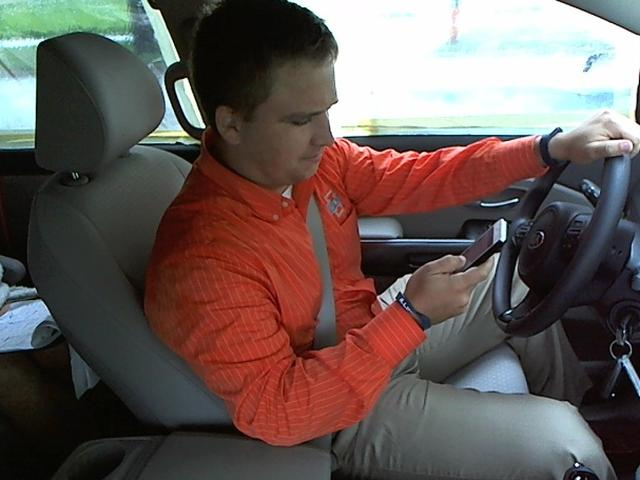

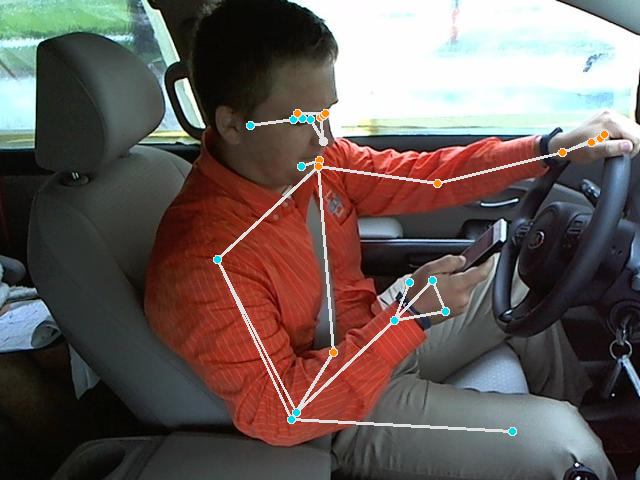

<class 'str'>
1/1 [==============================] - 0s 134ms/step
[[9.46467553e-05 7.29688227e-01 1.02520505e-06 1.01599895e-07
  3.49016704e-09 8.70747101e-08 3.01045307e-04 2.68511087e-01
  9.54776770e-04 4.49025945e-04]]
[1]
{0: 'c0', 1: 'c1', 2: 'c2', 3: 'c3', 4: 'c4', 5: 'c5', 6: 'c6', 7: 'c7', 8: 'c8', 9: 'c9'}


'TEXTING_RIGHT'

In [63]:
name = "img_71.jpg"
media_pipe(name)
path = '/content/drive/MyDrive/CV_project_final/Demo /Images/' 
return_prediction(path + name + "_")


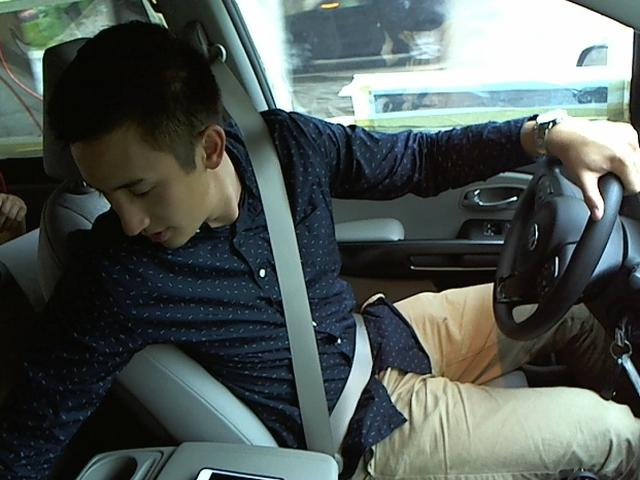

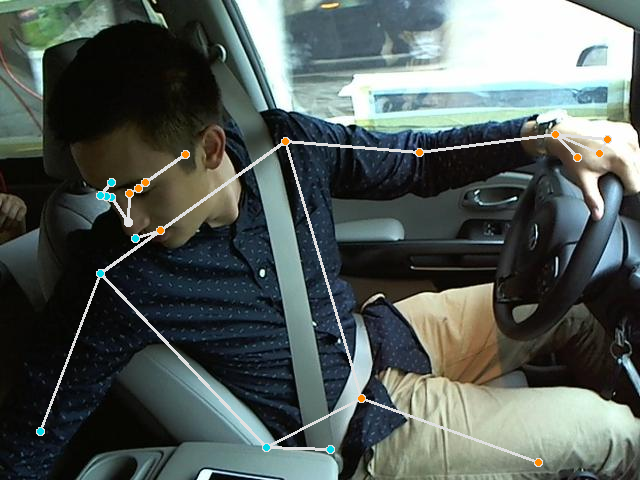

<class 'str'>
1/1 [==============================] - 0s 67ms/step
[[9.0422292e-09 9.3997710e-10 3.3319220e-10 6.5699899e-17 1.0646607e-12
  4.2465116e-09 3.9341846e-11 9.9992967e-01 5.2089022e-09 7.0312308e-05]]
[7]
{0: 'c0', 1: 'c1', 2: 'c2', 3: 'c3', 4: 'c4', 5: 'c5', 6: 'c6', 7: 'c7', 8: 'c8', 9: 'c9'}


'REACHING_BEHIND'

In [64]:
name = "img_61.jpg"
media_pipe(name)
path = '/content/drive/MyDrive/CV_project_final/Demo /Images/' 
return_prediction(path + name + "_")


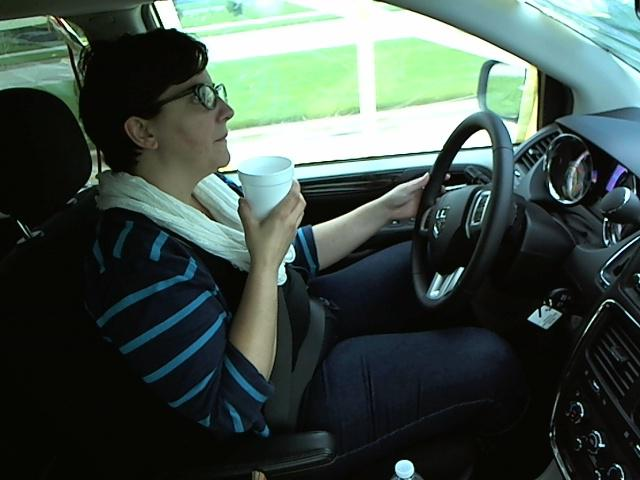

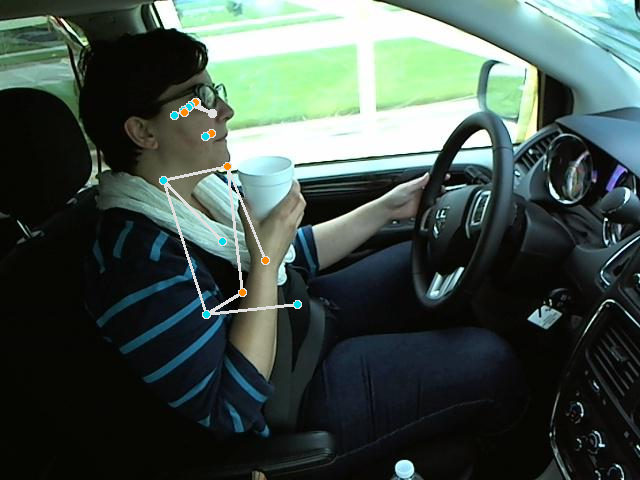

<class 'str'>
1/1 [==============================] - 0s 82ms/step
[[2.9628730e-10 7.8347551e-10 9.3173966e-09 5.9941781e-11 7.4809964e-10
  6.6644655e-11 1.0000000e+00 1.9048697e-10 5.7741106e-10 1.1917562e-12]]
[6]
{0: 'c0', 1: 'c1', 2: 'c2', 3: 'c3', 4: 'c4', 5: 'c5', 6: 'c6', 7: 'c7', 8: 'c8', 9: 'c9'}


'DRINKING'

In [65]:
name = "img_124.jpg"
media_pipe(name)
path = '/content/drive/MyDrive/CV_project_final/Demo /Images/' 
return_prediction(path + name + "_")


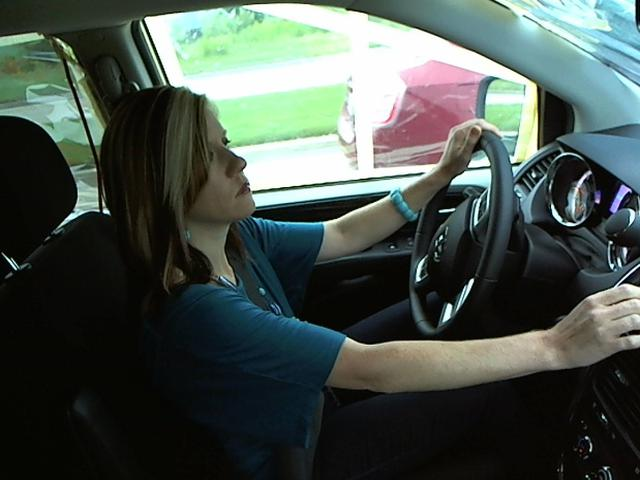

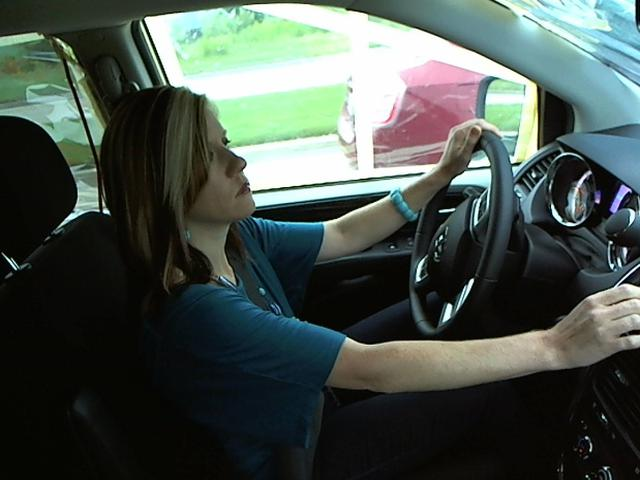

<class 'str'>
1/1 [==============================] - 0s 78ms/step
[[3.7103707e-20 7.4324238e-22 2.4682523e-24 7.4182006e-23 9.1747729e-22
  1.0000000e+00 4.6382840e-21 6.1130545e-19 2.5144536e-20 1.9216844e-15]]
[5]
{0: 'c0', 1: 'c1', 2: 'c2', 3: 'c3', 4: 'c4', 5: 'c5', 6: 'c6', 7: 'c7', 8: 'c8', 9: 'c9'}


'OPERATING_RADIO'

In [69]:
name = "img_389.jpg"
media_pipe(name)
path = '/content/drive/MyDrive/CV_project_final/Demo /Images/' 
return_prediction(path + name + "_")


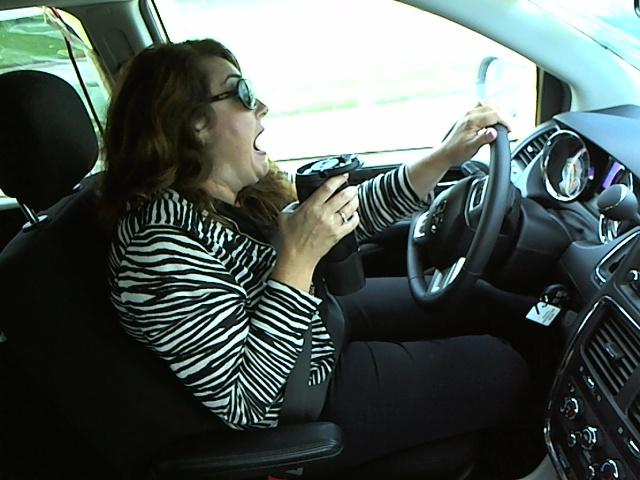

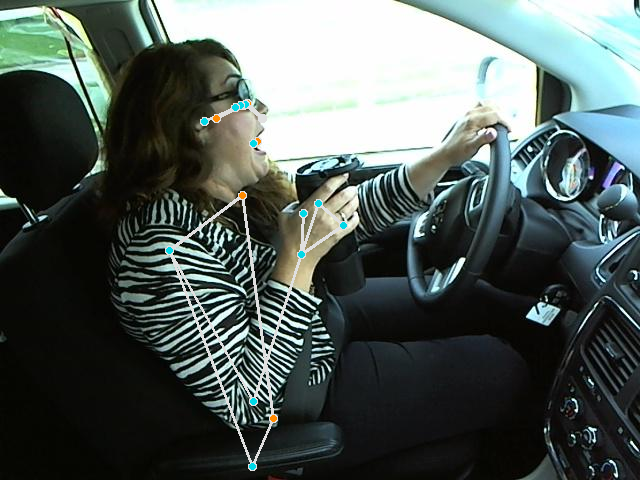

<class 'str'>
1/1 [==============================] - 0s 105ms/step
[[1.5200433e-10 1.0952816e-08 5.0022464e-07 1.2353309e-11 4.0260412e-10
  2.0042157e-10 9.9998164e-01 2.0544934e-10 1.7831791e-05 6.0167888e-09]]
[6]
{0: 'c0', 1: 'c1', 2: 'c2', 3: 'c3', 4: 'c4', 5: 'c5', 6: 'c6', 7: 'c7', 8: 'c8', 9: 'c9'}


'DRINKING'

In [66]:
name = "img_219.jpg"
media_pipe(name)
path = '/content/drive/MyDrive/CV_project_final/Demo /Images/' 
return_prediction(path + name + "_")


In [ ]:
# # import the necessary packages
# from collections import deque
# import numpy as np
# import argparse
# import pickle
# import cv2
# import os
# import json

# from keras.models import load_model
# import shutil

# from keras.preprocessing import image                  
# from tqdm.notebook import tqdm
# from PIL import ImageFile                            
# from google.colab.patches import cv2_imshow
# path = '/content/drive/MyDrive/CV_project_final/Demo /Images/' 
# return_prediction(path + name)


<class 'str'>
1/1 [==============================] - 0s 195ms/step
[[3.52042471e-03 1.72924520e-05 3.94718533e-08 8.73121023e-01
  7.29984367e-06 2.43253595e-09 3.15006776e-09 1.87948808e-06
  1.00409954e-04 1.23231702e-01]]
[3]
{0: 'c0', 1: 'c1', 2: 'c2', 3: 'c3', 4: 'c4', 5: 'c5', 6: 'c6', 7: 'c7', 8: 'c8', 9: 'c9'}


'TEXTING_LEFT'

In [ ]:
# import cv2
# import mediapipe as mp
# import numpy as np
# from matplotlib import pyplot as plt
# from google.colab.patches import cv2_imshow
# mp_drawing = mp.solutions.drawing_utils
# mp_drawing_styles = mp.solutions.drawing_styles
# mp_pose = mp.solutions.pose

# pose = mp_pose.Pose(static_image_mode=True, model_complexity=2, enable_segmentation=False, smooth_segmentation = False, min_detection_confidence=0.7) 

# image = cv2.imread("/content/drive/MyDrive/CV_project/test_img/img_197.jpg")
# image_height, image_width, _ = image.shape
# results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# BG_COLOR = (192, 192, 192) # gray
# annotated_image = image.copy()
# mp_drawing.draw_landmarks(
#     annotated_image,
#     results.pose_landmarks,
#     mp_pose.POSE_CONNECTIONS,
#     landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())


# directory = '/content/drive/MyDrive/CV_project/test_img'
# # prev_directory = '/content/drive/MyDrive/CV_project/merged_dataset_mediaPipe'
# img = annotated_image 
# # filename = filenamee
# del annotated_image 
# cv2.imwrite(os.path.join(directory , 'img_197_mp.jpg'), img) 
# del img